### <p style="text-align: right;"> &#9989; **Yating Liao** </p>

In [86]:
# Import the libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import warnings #to remove the warnings
warnings.filterwarnings('ignore')

In [87]:
# Import the dataset
Test1_1 = pd.read_csv(r'D:\Caroline\Documents\Graduate\ISE 530 Optimizaton for Analytics\Test-1_ISE 530_Summer23.csv')
print(Test1_1.head(10))

   Sample code number  Clump Thickness  Uniformity of Cell Size  \
0             1000025                5                        1   
1             1002945                5                        4   
2             1015425                3                        1   
3             1016277                6                        8   
4             1017023                4                        1   
5             1017122                8                       10   
6             1018099                1                        1   
7             1018561                2                        1   
8             1033078                2                        1   
9             1033078                4                        2   

   Uniformity of Cell Shape  Marginal Adhesion  Single Epithelial Cell Size  \
0                         1                  1                            2   
1                         4                  5                            7   
2                        

In [88]:
# Remove the first column which is Sample Code Number
Test1_1.drop('Sample code number', axis=1, inplace=True)

X = Test1_1.iloc[:,:-1].values # get columns except for the last one. 
print("Data of X:",X)
Y = Test1_1.iloc[:,-1].values # get the last one column which is class.
print("Data of Y:",Y)

Data of X: [[ 5  1  1 ...  3  1  1]
 [ 5  4  4 ...  3  2  1]
 [ 3  1  1 ...  3  1  1]
 ...
 [ 5 10 10 ...  8 10  2]
 [ 4  8  6 ... 10  6  1]
 [ 4  8  8 ... 10  4  1]]
Data of Y: [2 2 2 2 2 4 2 2 2 2 2 2 4 2 4 4 2 2 4 2 4 4 2 2 4 2 2 2 2 2 2 4 2 2 2 4 2
 4 4 4 4 4 4 2 4 2 2 4 4 4 4 4 4 4 4 4 4 4 4 2 4 4 2 4 2 4 4 2 2 4 2 4 4 2
 2 2 2 2 2 2 2 2 4 4 4 4 2 2 2 2 2 2 2 2 2 2 4 4 4 4 2 4 4 4 4 4 2 4 2 4 4
 4 2 2 2 4 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 4 2 2 4 2 4
 4 2 2 4 2 2 4 4 2 2 2 2 4 4 2 2 2 2 2 4 4 4 2 4 2 4 2 2 2 4 4 2 4 4 4 2 4
 4 2 2 2 2 2 2 2 2 4 4 2 2 2 4 4 2 2 2 4 4 2 4 4 4 2 2 4 2 2 4 4 4 4 2 4 4
 2 4 4 4 2 4 2 4 4 4 4 2 2 2 2 2 2 4 4 2 2 4 2 4 4 4 2 2 2 2 4 4 4 4 4 2 4
 4 4 2 4 2 4 4 2 2 2 2 4 2 2 4 4 4 4 4 2 4 4 2 2 4 4 2 2 4 4 2 4 2 4 4 2 2
 4 2 2 2 4 2 2 4 4 2 2 4 2 4 2 2 4 2 4 4 4 2 2 4 4 2 4 2 2 4 4 2 2 2 4 2 2
 2 4 4 2 2 2 4 2 2 4 4 4 4 4 4 2 2 2 2 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 4 2 2
 2 2 4 2 2 2 2 4 2 2 2 2 2 2 2 2 4 2 2 2 2 2 2 2 2 2 2 4 2 4 2 4 2 2 2 2

In [89]:
# We don't need to encode the dataset because the data size is similar

# Spliting the dataset into training and testing set
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 0)

In [90]:
# Feature Scaling--Normalization
# I choose the normalization meathod

from sklearn.preprocessing import MinMaxScaler
# Create an instance of MinMaxScaler
scaler = MinMaxScaler()
X_train_normal = scaler.fit_transform(X_train)
X_test_normal = scaler.fit_transform(X_test)
X_train_normal = pd.DataFrame(X_train_normal)
X_test_normal = pd.DataFrame(X_test_normal)
print("Normalized X train:", X_train_normal.head(10))
print("Normalized X test:",X_test_normal.head(10))

Normalized X train:           0         1         2         3         4         5         6  \
0  1.000000  0.000000  0.000000  0.000000  0.111111  1.000000  0.444444   
1  0.000000  0.000000  0.000000  0.000000  0.000000  0.000000  0.222222   
2  0.444444  0.000000  0.000000  0.000000  0.111111  0.000000  0.222222   
3  0.222222  0.000000  0.111111  0.000000  0.111111  0.000000  0.111111   
4  0.777778  0.111111  0.222222  0.000000  0.555556  0.222222  0.666667   
5  0.000000  0.000000  0.000000  0.000000  0.111111  0.000000  0.222222   
6  0.111111  0.000000  0.000000  0.000000  0.111111  0.000000  0.222222   
7  0.333333  0.000000  0.000000  0.222222  0.000000  0.000000  0.111111   
8  0.444444  0.666667  0.666667  0.000000  0.444444  0.777778  0.222222   
9  0.777778  1.000000  1.000000  0.777778  0.555556  0.888889  0.222222   

          7    8  
0  0.333333  0.0  
1  0.000000  0.0  
2  0.000000  0.0  
3  0.000000  0.0  
4  0.000000  0.0  
5  0.000000  0.0  
6  0.000000  0.0  
7 

## Training the Logistic Regression model on the Training Set

In [91]:
# Training the Logistic Regression model on the Training Set
from sklearn.linear_model import LogisticRegression
modelLogistic = LogisticRegression(random_state = 0)
modelLogistic.fit(X_train_normal, Y_train)
#print the regression coefficients
print("The intercept b0= ", modelLogistic.intercept_)
print("The coefficient b1= ", modelLogistic.coef_)  

The intercept b0=  [-4.98497464]
The coefficient b1=  [[2.31479863 1.46611995 1.60077767 1.37726984 1.35613885 2.76471853
  1.92988752 1.80420999 0.74381706]]


## Predicting the Test set results

In [2]:
y_test_pred = modelLogistic.predict(X_test_normal)
print(y_test_pred)
print(np.concatenate((y_test_pred.reshape(len(y_test_pred),1),Y_test.reshape(len(Y_test),1)),1))

NameError: name 'modelLogistic' is not defined

[[84  3]
 [ 5 45]]


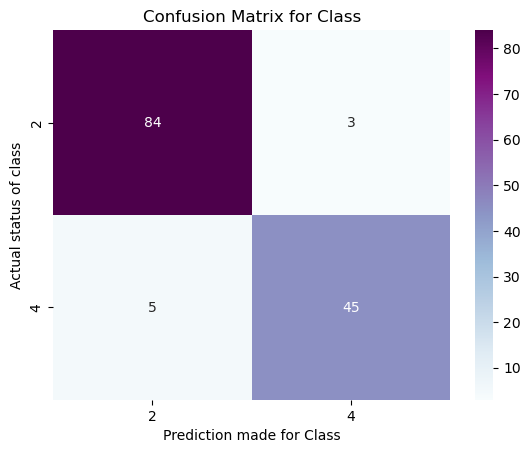

In [98]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score
ConfusionMatrix = confusion_matrix(Y_test, y_test_pred)
print(ConfusionMatrix)
ax = sns.heatmap(ConfusionMatrix,annot=True,cmap='BuPu')
ax.set_title('Confusion Matrix for Class');
ax.set_xlabel('Prediction made for Class')
ax.set_ylabel('Actual status of class');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['2','4'])
ax.yaxis.set_ticklabels(['2','4'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [99]:
print(accuracy_score(Y_test, y_test_pred))

0.9416058394160584


The accuracy rate of 94.16% is very high, meaning the logistic regression model is the good and fitted model.

## Try Standardization 

In [94]:
# Try Standardization
from sklearn.preprocessing import StandardScaler
scaler2 = StandardScaler()
X_train_stand = scaler2.fit_transform(X_train)
X_test_stand = scaler2.fit_transform(X_test)
X_train_stand = pd.DataFrame(X_train_stand)
X_test_stand = pd.DataFrame(X_test_stand)
print("Standized X train:", X_train_stand.head(10))
print("Standized X test:",X_test_stand.head(10))

Standized X train:           0         1         2         3         4         5         6  \
0  1.988395 -0.697811 -0.741526 -0.633637 -0.548720  1.815536  0.619074   
1 -1.224684 -0.697811 -0.741526 -0.633637 -0.997897 -0.682796 -0.188607   
2  0.203351 -0.697811 -0.741526 -0.633637 -0.548720 -0.682796 -0.188607   
3 -0.510666 -0.697811 -0.404973 -0.633637 -0.548720 -0.682796 -0.592447   
4  1.274378 -0.372444 -0.068420 -0.633637  1.247988 -0.127611  1.426754   
5 -1.224684 -0.697811 -0.741526 -0.633637 -0.548720 -0.682796 -0.188607   
6 -0.867675 -0.697811 -0.741526 -0.633637 -0.548720 -0.682796 -0.188607   
7 -0.153658 -0.697811 -0.741526  0.075309 -0.997897 -0.682796 -0.592447   
8  0.203351  1.254392  1.277791 -0.633637  0.798811  1.260351 -0.188607   
9  1.274378  2.230493  2.287450  1.847676  1.247988  1.537943 -0.188607   

          7         8  
0  0.345321 -0.338637  
1 -0.621578 -0.338637  
2 -0.621578 -0.338637  
3 -0.621578 -0.338637  
4 -0.621578 -0.338637  
5 -0.621578

In [95]:
# Training the Logistic Regression model on the Standized Training Set
from sklearn.linear_model import LogisticRegression
modelLogistic2 = LogisticRegression(random_state = 0)
modelLogistic2.fit(X_train_stand, Y_train)
#print the regression coefficients
print("The intercept b0= ", modelLogistic2.intercept_)
print("The coefficient b1= ", modelLogistic2.coef_)  

The intercept b0=  [-1.15196112]
The coefficient b1=  [[1.14397509 0.19849412 0.58494288 0.64708178 0.51186677 1.3058281
  0.98532234 0.78902716 0.43939809]]


In [96]:
y_test_pred2 = modelLogistic2.predict(X_test_stand)
print(y_test_pred2)
print(np.concatenate((y_test_pred2.reshape(len(y_test_pred2),1),Y_test.reshape(len(Y_test),1)),1))

[2 2 4 4 2 2 2 4 2 2 4 2 4 2 2 2 4 4 4 2 2 2 4 2 4 4 2 2 2 4 2 4 4 2 2 2 4
 4 2 4 2 2 2 2 2 2 2 4 2 2 4 2 4 2 2 2 4 4 2 4 2 2 2 2 2 2 2 2 4 4 2 2 2 2
 2 2 4 2 2 2 4 2 4 2 2 4 2 4 4 2 4 2 4 4 2 4 4 4 4 2 2 2 4 4 2 2 4 2 2 2 4
 2 2 4 2 2 2 2 2 2 2 4 2 2 4 4 2 4 2 4 2 2 4 2 2 4 2]
[[2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [2 2]
 [4 4]
 [2 2]
 [4 2]
 [4 4]
 [2 2]
 [4 4]
 [2 2]
 [4 4]
 [4 4]
 [2 4]
 [4 2]
 [4 4]
 [4 4]
 [4 4]
 [2 2]
 [2 2]
 [2 2]
 [4 4]


[[84  3]
 [ 3 47]]


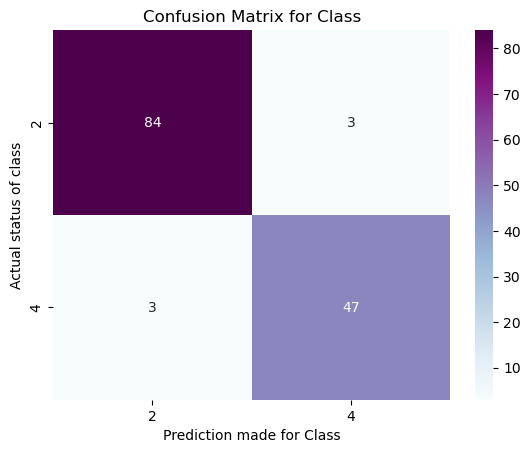

In [100]:
# Confusion Matrix2
from sklearn.metrics import confusion_matrix, accuracy_score
CM2 = confusion_matrix(Y_test, y_test_pred2)
print(CM2)
ax = sns.heatmap(CM2,annot=True,cmap='BuPu')
ax.set_title('Confusion Matrix for Class');
ax.set_xlabel('Prediction made for Class')
ax.set_ylabel('Actual status of class');
## Ticket labels – List must be in alphabetical order
ax.xaxis.set_ticklabels(['2','4'])
ax.yaxis.set_ticklabels(['2','4'])
## Display the visualization of the Confusion Matrix.
plt.show()

In [101]:
print(accuracy_score(Y_test, y_test_pred2))

0.9562043795620438


After standization, the accurcacy rate is higer than the normalization data, meaning the standardization is better than the normalization. (There are other possible factors that influence on the result, but I am not going to analyze so deeply here. )